In [34]:
#puntos = [(x1,y1), (x2, y2), ...] #Lista de puntos sobre los que se buscarán círculos
#clusters = [((x,y), r)] #Tupla con las coordenadas del centro y el radio del cluster
#pertenencias = {(1,2):(0.97,0.03)} #Diccionario de tuplas, la Key será el punto y en value, por orden de cluster, su pertenencia

In [35]:
#OBJETIVO ESPECÍFICO 2
from math import sqrt 
  
# Function to find the circle on  
# which the given three points lie  
def find_circle(point1, point2, point3) : 
    x1 = point1[0];
    x2 = point2[0];
    x3 = point3[0];
    y1 = point1[1];
    y2 = point2[1];
    y3 = point3[1];
    
    x12 = x1 - x2;  
    x13 = x1 - x3;  
  
    y12 = y1 - y2;  
    y13 = y1 - y3;  
  
    y31 = y3 - y1;  
    y21 = y2 - y1;  
  
    x31 = x3 - x1;  
    x21 = x2 - x1;  
  
    # x1^2 - x3^2  
    sx13 = pow(x1, 2) - pow(x3, 2);  
  
    # y1^2 - y3^2  
    sy13 = pow(y1, 2) - pow(y3, 2);  
  
    sx21 = pow(x2, 2) - pow(x1, 2);  
    sy21 = pow(y2, 2) - pow(y1, 2);  
  
    f = (((sx13) * (x12) + (sy13) * 
          (x12) + (sx21) * (x13) + 
          (sy21) * (x13)) / (2 * 
          ((y31) * (x12) - (y21) * (x13)))); 
              
    g = (((sx13) * (y12) + (sy13) * (y12) + 
          (sx21) * (y13) + (sy21) * (y13)) / 
          (2 * ((x31) * (y12) - (x21) * (y13))));  
  
    c = (-pow(x1, 2) - pow(y1, 2) - 
         2 * g * x1 - 2 * f * y1);  
  
    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0  
    # where centre is (h = -g, k = -f) and  
    # radius r as r^2 = h^2 + k^2 - c  
    h = -g;  
    k = -f;  
    sqr_of_r = h * h + k * k - c;  
  
    # r is the radius  
    r = round(sqrt(sqr_of_r), 5);  
    
    return ((h, k), r) #Devolvemos el círculo como una tupla que definimos anteriormente, centro y radio


In [36]:
#PROBLEMA DETECTADO: puntos casi en la misma recta generan círculos desproporcionados
point1 = (2.2, 0.9)
point2 = (2.3, 1)
point3 = (2.4,1.1)
print("Círculo desproporcionado: ", find_circle(point1, point2, point3))

#SOLUCIÓN: comprobar que los vectores que unen los 3 puntos no tengan un ángulo de casi 180 grados entre sí

#SEGUNDO PROBLEMA DETECTADO: puntos en la misma recta no pueden generar un círculo
point1 = (2.2, 1)
point2 = (2.3, 1)
point3 = (2.4,1)
print("La siguiente línea de código no funciona: ")
#print(find_circle(point1, point2, point3))

#SOLUCIÓN: comprobar que los puntos no estén en la misma recta

#Esto nos servirá para más adelante, cuando implementemos la herramienta final

Círculo desproporcionado:  ((57646075230345.1, -57646075230341.6), 81523861408330.39)
La siguiente línea de código no funciona: 


In [37]:
import numpy as np
#Métodos para calcular ángulo entre 2 vectores
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

#Esta función, si nos devuelve 0 o 180 significará que los 3 puntos generarían un círculo desproporcionado, dado que
#el ángulo que formarían entre sí los 3 puntos sería tan grande que es lo más probable que pase
import math 

def calcula_angulo_en_grados(point1, point2, point3):
    A = (point2[0] - point1[0], point2[1]-point1[1])
    E = (point3[0] - point1[0], point3[1]-point1[1])

    return math.degrees(angle_between(E,A))

#Calculamos los vectores entre los puntos y si sus coordenadas son proporcionales, están alineados
#Comprobamos que las 3 coordenadas "x" y las 3 coordenadas "y" no sean iguales entre sí
#Comprobamos que los denominadores no sean 0 y, si lo son, que lo sean en ambos lugares de la ecuación
def puntos_alineados(point1, point2, point3):
    if point1[0]==point2[0]==point3[0] or point1[1]==point2[1]==point3[1]:
        return True
    elif (point3[0]-point2[0]) == 0 or (point3[1]-point2[1])==0:
        return (point3[0]-point2[0]) == 0 == (point3[1]-point2[1])
    else:
        return (point2[0]-point1[0])/(point3[0]-point2[0])==(point2[1]-point1[1])/(point3[1]-point2[1])

In [38]:
#OBJETIVO ESPECÍFICO 2, Primera opción probada, coger los puntos de 3 en 3 en orden de aparición en la lista, si se llega
#al final de ésta, se cogen los primeros. Descartado por posible sobreajuste a los datos dados
def encontrar_centro_radio(puntos):
        circles = [];
        for x in range(0, len(puntos), 3):
            if len(puntos)-x>=3:
                circles.append(find_circle(puntos[x], puntos[x+1], puntos[x+2]))
            elif len(puntos)-x==2:
                circles.append(find_circle(puntos[x], puntos[0], puntos[1]))
            else:
                circles.append(find_circle(puntos[x], puntos[x+1], puntos[0]))
        centros_x = [];
        for x in range (0, len(circles)):
            centros_x.append(circles[x][0][0])
        centros_y = [];
        for x in range (0, len(circles)):
            centros_y.append(circles[x][0][1])
        centro_media = (sum(centros_x)/len(centros_x), sum(centros_y)/len(centros_y))
        radios = []
        for x in range (0, len(circles)):
            radios.append(circles[x][1])
        radio_media = sum(radios)/len(radios)
        
        return (centro_media, radio_media)

In [39]:
#Cogemos solo los puntos del primer ejemplo dado en puntos.txt, dado que es mucho más diferenciable qué punto pertenece
#a qué circunferencia
puntos1 = [(3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)]
puntos2 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5)]
print(encontrar_centro_radio(puntos1))
print(encontrar_centro_radio(puntos2))

((2.0033333333333334, 2.0033333333333334), 0.9966833333333334)
((9.006830601092895, 5.002240437158469), 2.023026666666667)


In [40]:
#OBJETIVO ESPECÍFICO 2, Segunda opción probada, en este método generamos tantas listas aleatorias de 3 puntos como
#puntos hay en la lista. Resulta más fiable debido a que se hacen más círculos y la media calculará con mayor precisión el círculo
from random import sample 
import random as r 
def encontrar_centro_radio_random(puntos, seed):
        circles = [];
        for x in range(0, len(puntos)): #Ampliable al valor que se quiera dado que se cogerán puntos aleatoriamente siempre
            r.seed(seed)
            puntos_random=sample(puntos,3)
            circles.append(find_circle(puntos_random[0], puntos_random[1], puntos_random[2]))
        centros_x = [];
        for x in range (0, len(circles)):
            centros_x.append(circles[x][0][0])
        centros_y = [];
        for x in range (0, len(circles)):
            centros_y.append(circles[x][0][1])
        centro_media = (sum(centros_x)/len(centros_x), sum(centros_y)/len(centros_y))
        radios = []
        for x in range (0, len(circles)):
            radios.append(circles[x][1])
        radio_media = sum(radios)/len(radios)
        
        return (centro_media, radio_media)

In [41]:
#Cogemos solo los puntos del primer ejemplo dado en puntos.txt, dado que es mucho más diferenciable qué punto pertenece
#a qué circunferencia
puntos1 = [(3., 2.), (2., 3.), (1., 2.), (2., 1.), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)]
puntos2 = [(9., 7.), (7.7, 6.5), (7., 5.), (11., 5.), (9., 3.), (10.3, 3.5), (7.3, 4), (10.3, 6.5)]
seed = 1
print(encontrar_centro_radio_random(puntos1, seed))
print(encontrar_centro_radio_random(puntos2, seed))

((2.0, 1.9999999999999998), 1.0)
((9.0, 5.0), 2.0)


In [42]:
#OBJETIVO ESPÉCIFICO 3
from math import sqrt 
def distancia_punto_centro(punto, centro):
    x1 = punto[0]
    x2 = centro[0]
    y1 = punto[1]
    y2 = centro[1]
    
    return sqrt((x2-x1)**2+(y2-y1)**2)

#Calculamos el grado de pertenencia del punto a cada cluster siguiendo la fórmula propuesta en el PDF
def grado_pertenencia(clusters, punto):
    grados = [];
    for x in clusters:
        distancia_centro = distancia_punto_centro(punto, x[0])
        distancia = abs(distancia_centro-x[1])
        if distancia==0:
        #Este valor "infla" la pertenencia por estar justo en la circunferencia, necesario dado que los puntos muy cercanos a 
        #una circunferencia tenían mucho más grado de pertenencia que los que están sobre ella, después se normalizarán
            grados.append(1) 
        else:
            grados.append(1/distancia)
    grados_normalizados = [];
    for x in grados:
        grados_normalizados.append(x/(sum(grados)));
    return grados_normalizados

In [43]:
punto1 = (3.1, 2.1)
punto2 = (9., 7.)
clusters = [((2, 2), 1), ((9, 5), 2), ((12, 15), 0.5)]
print(grado_pertenencia(clusters, punto1))
grado_pertenencia(clusters, punto2)

[0.9711157140376818, 0.02219335170620128, 0.006690934256116968]


[0.10474036591916626, 0.7962703303065681, 0.09898930377426571]

In [44]:
#OBJETIVO ESPECÍFICO 4, Métodos auxiliares

#Este método calcula el peso que tendrá el círculo para la media ponderada, teniendo en cuenta la pertenencia de los 3
#puntos usados para generar el círculo respecto al cluster
def get_peso(punto1, punto2, punto3, pertenencias, indice_cluster):
    w = pertenencias[punto1][indice_cluster]*pertenencias[punto2][indice_cluster]*pertenencias[punto3][indice_cluster]
    return w

#Se calcula la media ponderada con los pesos normalizados para simplificar los cálculos
def media_ponderada_normalizada(datos, pesos_normalizados):
    acumulador = 0;
    for i in range(0, len(datos)):
        acumulador = acumulador + datos[i]*pesos_normalizados[i]
    return acumulador;

#Se asignan clusters que pasen de un umbral de pertenencia puesto a mano, en este caso, 0.4, debido a que mediante pruebas
#hemos llegado a la conclusión de que un valor por debajo a éste podría no ser representativo (además, los métodos que usamos
#no son muy eficientes en tiempo y recortar el número de puntos de un cluster reduce las combinaciones posibles)
def asigna_puntos_cluster(clusters, puntos, pertenencias):
    puntos_cluster = {}
    for c in clusters:
        puntos_cluster[c]=[]; #Inicializamos los valores del diccionario con los clusters como key
    #Buscamos los clusters con una pertenecia superior al umbral dado, 0.4 en este caso
    for p in puntos:
        grados = pertenencias[p]
        indice_cluster = 0;
        for g in range(0, len(grados)):
            if grados[g]>0.4:
                puntos_cluster[clusters[g]].append(p);
        #Introducimos el punto en la lista de puntos de su cluster
    return puntos_cluster

In [45]:
#OBJETIVO ESPECÍFICO 4
from random import sample 
from itertools import combinations
import random as r 
def encontrar_circulos_por_pertenencia_random(puntos, pertenencias, clusters):
    circulos = []
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias);
    #Para cada cluster, calculamos un círculo nuevo que se ajuste a los puntos que pertenecen a él
    for i in range(0, len(puntos_cluster)):
        puntos = puntos_cluster[clusters[i]];
        circulos_para_media = [];
        pesos = [];
#       Se realizarán todas las combinaciones de 3 puntos distintos para cada cluster, calculando los circulos que formen y 
#       posteriormente haciendo la media entre todos estos círculos
        for x in combinations(puntos, 3): 
        #Se probó con este método para generar listas aleatorias pero la fiabilidad de la combinatoria nos pareció mejor 
        #dado que sample podría devolver alguna lista repetida de puntos y eso aumentaría el peso de un círculo
#             puntos_random=sample(puntos,3); 
            puntos_random = x
            #Se realizan comprobaciones para evitar calcular círculos desorbitados o círculos inexistentes
            angulo_puntos = calcula_angulo_en_grados(puntos_random[0], puntos_random[1], puntos_random[2])
            if ((puntos_alineados(puntos_random[0], puntos_random[1], puntos_random[2]))
                or angulo_puntos < 3 or angulo_puntos> 177):
                salta_iteracion = 0
            else:
                circulos_para_media.append(find_circle(puntos_random[0], puntos_random[1], puntos_random[2]));
                pesos.append(get_peso(puntos_random[0], puntos_random[1], puntos_random[2], pertenencias, i));
        #Normalizaremos los pesos para hacer una media ponderada teniendo en cuenta el grado de pertenencia de cada
        #punto al cluster
        suma_pesos = sum(pesos);
        pesos_normalizados = [];
        for i in range (0, len(pesos)):
            pesos_normalizados.append(pesos[i]/suma_pesos);
        centros_x = [];
        for i in range (0, len(circulos_para_media)):
            centros_x.append(circulos_para_media[i][0][0]);
        centros_y = [];
        for i in range (0, len(circulos_para_media)):
            centros_y.append(circulos_para_media[i][0][1]);
        centro_media = (media_ponderada_normalizada(centros_x, pesos_normalizados), media_ponderada_normalizada(centros_y, pesos_normalizados))
        radios = [];
        for i in range (0, len(circulos_para_media)):
            radios.append(circulos_para_media[i][1]);
        radio_media = media_ponderada_normalizada(radios, pesos_normalizados);
            
        
        circulos.append((centro_media, radio_media));
    return circulos;

In [46]:
clusters = [((9,7), 2), ((3, 3), 1.5)] #Tupla con las coordenadas del centro y el radio del cluster
puntos = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
pertenencias = {} #Diccionario de tuplas, la Key será el punto y en value, por orden de cluster, su pertenencia
for p in puntos:
    pertenencias[p] = grado_pertenencia(clusters, p);
print(pertenencias);
encontrar_circulos_por_pertenencia_random(puntos, pertenencias, clusters)

{(9, 7): [0.7406337178385322, 0.2593662821614678], (7.7, 6.5): [0.8777657942999755, 0.12223420570002452], (7, 5): [0.7820251611764839, 0.21797483882351612], (11, 5): [0.8906314620414016, 0.10936853795859844], (9, 3): [0.6923076923076923, 0.30769230769230765], (10.3, 3.5): [0.7704023348824451, 0.2295976651175549], (7.3, 4): [0.6680703201812775, 0.3319296798187225], (10.3, 6.5): [0.9157052976433946, 0.08429470235660541], (3, 2): [0.07923616745452473, 0.9207638325454753], (2, 3): [0.07619328883106415, 0.9238067111689359], (1, 2): [0.09009345814565807, 0.9099065418543419], (2, 1): [0.09252184964173306, 0.907478150358267], (1.2, 1.4): [0.10673043568266445, 0.8932695643173355], (1.2, 2.6): [0.047114975353884904, 0.9528850246461151], (2.7, 1.3): [0.033660017054950725, 0.9663399829450492], (2.8, 2.6): [0.15818487721784125, 0.8418151227821589]}


[((9.000490167464315, 5.003638713731093), 1.990823512842203),
 ((1.9982005809871164, 2.001946778874534), 0.9987449847722041)]

In [47]:
#OBJETIVO ESPECÍFICO 5 HERRAMIENTA DE BÚSQUEDA DE ANILLOS
def busqueda_anillos(puntos, clusters_iniciales, iteraciones):
    i = 0;
    clusters = clusters_iniciales;
    while i < iteraciones:
        pertenencias = {}
        for p in puntos:
            pertenencias[p] = grado_pertenencia(clusters, p);
        clusters = encontrar_circulos_por_pertenencia_random(puntos, pertenencias, clusters);
        i+=1
    return clusters;

In [48]:
clusters = [((12,12), 2), ((2, 2), 1.5)] #Tupla con las coordenadas del centro y el radio del cluster
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
seed = 1
print("Búsqueda de anillos en puntos 1: \n", busqueda_anillos(puntos1, clusters, 10))

clusters = [((9,5), 1.5), ((10, 5), 2), ((15, 18), 3)] #Tuplas con las coordenadas del centro y el radio del cluster
seed = 1
puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
print("Búsqueda de anillos en puntos 2: \n", busqueda_anillos(puntos2, clusters, 10))

Búsqueda de anillos en puntos 1: 
 [((9.000756676736554, 5.004553463770741), 1.991005681574395), ((1.9982808758736619, 2.0018808526001455), 0.9987941415912557)]
Búsqueda de anillos en puntos 2: 
 [((8.991091574182256, 5.000790792765707), 2.006824562261606), ((9.00268663405843, 4.985624842624402), 3.008560286309456), ((19.991106543776926, 18.002607972682256), 5.997727688292941)]


In [49]:
#Para finalizar, sabemos la importancia de los clusters iniciales y hemos invertido bastante tiempo diseñando métodos para
#generar buenos clusters iniciales

In [54]:
import random as r
from random import uniform
from math import sqrt 

#Este fue nuestro primer método, completamente aleatorio, solo se delimitaba que los centros estuviesen entre los valores
#extremo de x e y. En cuanto al radio, debía ser un valor entre 0 y la máxima distancia posible/2 (si no se divide entre 2
#sería el diámetro máximo)
def busca_clusters_iniciales_random(puntos, n_clusters):
    clusters = [];
    for i in range(0, n_clusters):
        xs = [];
        ys = [];       
        for i in range(0, len(puntos)):
            xs.append(puntos[i][0]);
            ys.append(puntos[i][1]);
        min_x = min(xs);
        max_x = max(xs);
        min_y = min(ys);
        max_y = max(ys);
        max_distancia = sqrt((max_x-min_x)**2+(max_y-min_y)**2)/2
        clusters.append(((uniform(min_x, max_x), uniform(min_y, max_y)), uniform(0, max_distancia)))
    pertenencias = {}
    for p in puntos:
        pertenencias[p] = grado_pertenencia(clusters, p)
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias)
    for cluster in puntos_cluster:
        #Si el cluster generado no tiene al menos 3 puntos, no podrán hacerse correctamente los cálculos del algoritmo
        if len(puntos_cluster[cluster])<3:
            clusters = busca_clusters_iniciales_random(puntos, n_clusters);
    return clusters;
    

[((23.35562128869987, 23.423055195513214), 10.466056433582041), ((16.17747492155781, 10.315314355559376), 5.157498380475954), ((10.115235145894093, 16.831366313431012), 6.436266264437174)]
[((19.991113790877193, 18.002612872516703), 5.997721461343435), ((9.153288835125453, 5.05880909844888), 3.1822710086352473), ((0, 0), 0)]


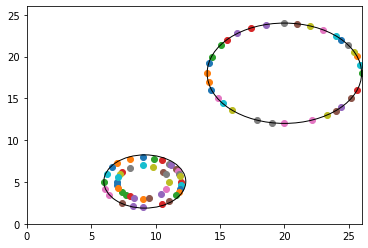

In [67]:
puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
clusters_iniciales = busca_clusters_iniciales_random(puntos2, 3)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos2, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 26), ylim = (0, 26))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos2:
    plt.scatter(p[0], p[1]) 

[((1.9048843869574763, 4.446137397444222), 1.9760150596601607), ((3.27426233816732, 6.799588530068887), 0.2393737211198569)]
[((1.9982808758736614, 2.0018808526001455), 0.9987941415912557), ((9.000756676736556, 5.004553463770742), 1.9910056815743955)]


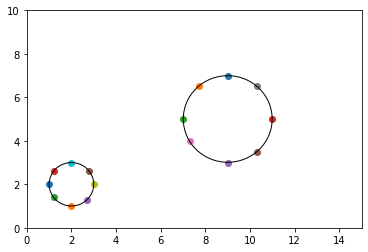

In [95]:
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
clusters_iniciales = busca_clusters_iniciales_random(puntos1, 2)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos1, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 15), ylim = (0, 10))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos1:
    plt.scatter(p[0], p[1]) 

In [55]:
import numpy as np
from numpy.linalg import norm

def distancia_a_recta(A, B, P):

    #Calculamos el angulo entre AB y AP, si es mayor de 90 grados retornamos la distancia entre A y P
    if np.arccos(np.dot((P-A)/norm(P-A), (B-A)/norm(B-A))) > np.pi/2:
        return norm(P-A)

    #Calculamos el angulo entre AB y BP, si es mayor de 90 grados retornamos la distancia entre B y P.
    elif np.arccos(np.dot((P-B)/norm(P-B), (A-B)/norm(A-B))) > np.pi/2:
        return norm(P-B)

    #Como ambos angulos son menores o iguales a 90º sabemos que podemos hacer una proyección ortogonal del punto.
    return norm(np.cross(B-A, A-P))/norm(B-A)

import random as r
from random import uniform
from math import sqrt 

#La idea con este método era generar centros aleatorios y a raíz de éstos, hacer que el radio máximo del círculo no sobrepasase
#los "bordes" que delimitados por xmax, ymax, xmin, ymin; dado que más allá de ellos no habría puntos y pensamos que como
#estimación inicial no sería un problema que los radios fuesen menores, que se adaptarían según itera el algoritmo
def busca_clusters_iniciales_random_radio_bordes(puntos, n_clusters):
    clusters = [];
    for i in range(0, n_clusters):
        xs = [];
        ys = [];       
        for i in range(0, len(puntos)):
            xs.append(puntos[i][0]);
        for i in range(0, len(puntos)):
            ys.append(puntos[i][1]);
        x_min = min(xs);
        x_max = max(xs);
        y_min = min(ys);
        y_max = max(ys);
        x_random = uniform(x_min, x_max)
        y_random = uniform(y_min, y_max)
        #Comprobaremos la distancia que hay del centro generado a los "bordes" para que el radio no lo sobrepase
        distancia1 = distancia_a_recta(np.array((x_min, y_min)), np.array((x_min, y_max)), np.array((x_random, y_random)))
        distancia2 = distancia_a_recta(np.array((x_min, y_max)),np.array((x_max, y_max)),np.array((x_random, y_random)))
        distancia3 = distancia_a_recta(np.array((x_max, y_max)),np.array((x_max, y_min)),np.array((x_random, y_random)))
        distancia4 = distancia_a_recta(np.array((x_min, y_min)),np.array((x_max, y_min)),np.array((x_random, y_random)))
        if distancia1<=distancia2 and distancia1<=distancia3 and distancia1<=distancia4:
            max_distancia = distancia1
        elif distancia2<=distancia1 and distancia2<=distancia3 and distancia2<=distancia4:
            max_distancia = distancia2
        elif distancia3<=distancia1 and distancia3<=distancia2 and distancia3<=distancia4:
            max_distancia = distancia3
        elif distancia4<=distancia1 and distancia4<=distancia3 and distancia4<=distancia2:
            max_distancia = distancia4
        clusters.append(((x_random, y_random), uniform(0, max_distancia)))
    pertenencias = {}
    for p in puntos:
        pertenencias[p] = grado_pertenencia(clusters, p)
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias)
    for cluster in puntos_cluster:
        if len(puntos_cluster[cluster])<3:
            clusters = busca_clusters_iniciales_random_radio_bordes(puntos, n_clusters);
    return clusters;
    

[((7.175702324129826, 8.569330891706294), 1.1379661712773526), ((23.510684884703185, 8.74050564733141), 2.1371128884434554), ((12.207272547062681, 22.664345506976215), 0.993516067898072)]
[((9.148997511100289, 5.057289360845136), 3.1805895241386137), ((20.00212256216059, 17.99964784031268), 5.99613232818176), ((19.984997850831114, 18.030904960531593), 6.01183705007111)]


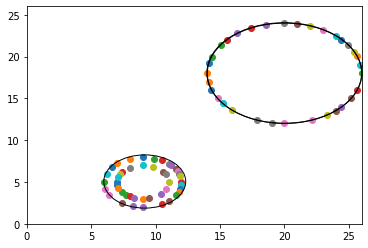

In [66]:
puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
clusters_iniciales = busca_clusters_iniciales_random_radio_bordes(puntos2, 3)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos2, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 26), ylim = (0, 26))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos2:
    plt.scatter(p[0], p[1]) 

[((2.8681285021256757, 5.7563908329815305), 0.72005795763172), ((10.213514648587207, 2.475088775202635), 0.07939382638710132)]
[((1.9982808758736614, 2.0018808526001455), 0.9987941415912557), ((9.000756676736554, 5.004553463770741), 1.9910056815743955)]


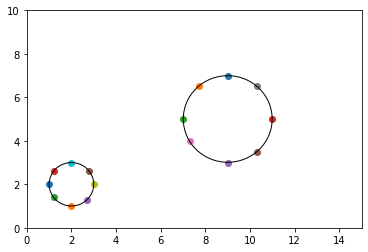

In [96]:
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
clusters_iniciales = busca_clusters_iniciales_random_radio_bordes(puntos1, 2)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos1, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 15), ylim = (0, 10))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos1:
    plt.scatter(p[0], p[1]) 

In [ ]:
#Llegados a este punto, nos dimos cuenta de que el verdadero problema era conseguir generar clusters iniciales de manera
#que los círculos concéntricos fuesen detectados con una probabilidad más alta, intentando el menor sobreajuste posible

In [77]:
from math import sqrt 
def distancia_entre_puntos(punto1, punto2):
    return sqrt((punto2[0]-punto1[0])**2+(punto2[1]-punto1[1])**2)

In [79]:
from random import sample 
from math import sqrt 
#Con este método quisimos encontrar clusters iniciales basándonos en la premisa de que los puntos cercanos tienen mayor
#probabilidad de general una circunferencia con sentido, así que eso intentamos, tomar un punto aleatorio, encontrar otros
#dos que fuesen cercanos consecutivamente y calcular una circunferencia con estos 3
def busca_clusters_iniciales_cercania(puntos, n_clusters):
    clusters = []
    for i in range(0, n_clusters):
        punto_random = sample(puntos,1)[0]
        origen = (0,0)
        punto2 = origen
        distancia = distancia_entre_puntos(punto_random, origen)
        for punto in puntos:
            if punto != punto_random:
                distancia_candidata = distancia_entre_puntos(punto_random, punto)
                if distancia < distancia_candidata:
                    distancia = distancia_candidata
                    punto2 = punto
        punto3 = origen
        distancia = distancia_entre_puntos(punto2, origen)
        for punto in puntos:
            if punto != punto_random and punto != punto2:
                distancia_candidata = distancia_entre_puntos(punto2, punto)
                if distancia < distancia_candidata:
                    distancia = distancia_candidata
                    punto3 = punto
        angulo_puntos = calcula_angulo_en_grados(punto_random, punto2, punto3)
        if ((puntos_alineados(punto_random, punto2, punto3))
            or angulo_puntos < 3 or angulo_puntos> 177):
                clusters = busca_clusters_iniciales_cercania(puntos, n_clusters)
        else:
            clusters.append(find_circle(punto_random, punto2, punto3));
    
    pertenencias = {}
    for p in puntos:
        pertenencias[p] = grado_pertenencia(clusters, p)
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias)
    for cluster in puntos_cluster:
        if len(puntos_cluster[cluster])<3:
            clusters = busca_clusters_iniciales_cercania(puntos, n_clusters);
    return clusters

[((0.24541688244432872, 22.757560849300884), 22.75888), ((-4.331089351285191, 27.294614443084463), 27.63611), ((158.1610169491525, -144.65508474576268), 214.33619)]
[((0, 0), 0), ((9.153288845528301, 5.058809100405649), 3.1822710064296995), ((19.991113790877243, 18.002612872516686), 5.997721461343349)]


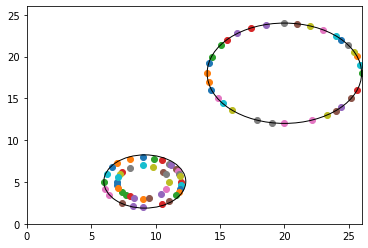

In [84]:
puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
clusters_iniciales = busca_clusters_iniciales_cercania(puntos2, 3)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos2, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 26), ylim = (0, 26))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos2:
    plt.scatter(p[0], p[1]) 
#El problema principal es que al estar tan cerca los unos de los otros, se generan círculos enormes, con grandes radios,
#lo cual dificulta que se llegue a detectar el círculo concéntrico de menor radio

[((2.5358695652173906, 7.392391304347829), 7.81525), ((2.5358695652173906, 7.392391304347829), 7.81525)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


[((5.45500045109221, 3.7650156278209095), 6.0064373214285816)]


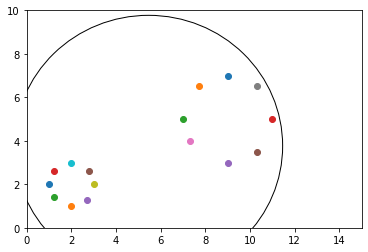

In [107]:
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
clusters_iniciales = busca_clusters_iniciales_cercania(puntos1, 2)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos1, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 15), ylim = (0, 10))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos1:
    plt.scatter(p[0], p[1]) 
#Como tenemos un menor muestreo de puntos en este ejemplo, las circunferencias iniciales no son tan desorbitadas, pero
#los clusters iniciales no difieren entre sí mucho a veces, dando lugar a problemas con el algoritmo

In [108]:
#ESTE MÉTODO DA UN 40-50% DE ACIERTO para puntos2 en 50 intentos
from random import sample 
from math import sqrt 
#La idea detrás de este método es generar círculos tomando 2 puntos aleatorios, calcular el vector que los une, tomar
#el punto medio como centro y luego calcular el radio como la mitad del módulo del vector
def busca_clusters_iniciales_dos_puntos(puntos, n_clusters):
    clusters = []
    for i in range(0, n_clusters):
        puntos_cluster = sample(puntos, 2)
        centro = ((puntos_cluster[0][0]+puntos_cluster[1][0])/2, (puntos_cluster[0][1]+puntos_cluster[1][1])/2)
        radio = sqrt((puntos_cluster[0][0]-puntos_cluster[1][0])**2+(puntos_cluster[0][1]-puntos_cluster[1][1])**2)/2
        clusters.append(((centro[0], centro[1]), radio))
    pertenencias = {}
    for p in puntos:
        pertenencias[p] = grado_pertenencia(clusters, p)
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias)
    for cluster in puntos_cluster:
        if len(puntos_cluster[cluster])<3:
            clusters = busca_clusters_iniciales_dos_puntos(puntos, n_clusters);
    return clusters

[((13.399999999999999, 9.0), 5.7870545184921145), ((17.5, 13.0), 9.86154146165801), ((11.05, 12.95), 6.9544949493115595)]
[((9.16639242711471, 4.9063470692559), 3.1581891927721233), ((9.276365126737455, 5.268989040775364), 2.634353286852796), ((19.991104375985362, 18.002606182199333), 5.99772973660674)]


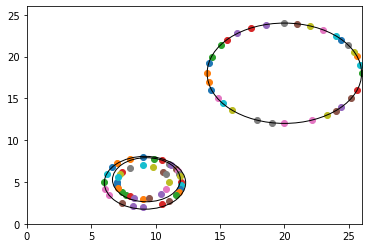

In [118]:
puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
clusters_iniciales = busca_clusters_iniciales_dos_puntos(puntos2, 3)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos2, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 26), ylim = (0, 26))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos2:
    plt.scatter(p[0], p[1]) 
    #Con este método vimos que se tenían más en cuenta la posibilidad de la existencia de círculos concéntricos, así que
    #quisimos refinarlo

[((5.9, 4.8), 3.801315561749643), ((2.0, 2.0), 1.0)]
[((9.000756676736554, 5.004553463770741), 1.991005681574395), ((1.9982808758736617, 2.001880852600146), 0.9987941415912558)]


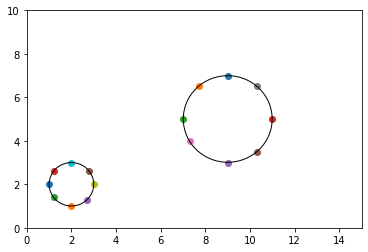

In [115]:
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
clusters_iniciales = busca_clusters_iniciales_dos_puntos(puntos1, 2)
print(clusters_iniciales)
circulos = busqueda_anillos(puntos1, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 15), ylim = (0, 10))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos1:
    plt.scatter(p[0], p[1]) 

In [119]:
#50-60% ACIERTO EN PUNTOS2 en 50 intentos, mejor método de búsqueda de clusters iniciales que conseguimos
from random import sample 
from math import sqrt 

#Para este método seguimos la forma de calcular círculos del método anterior, pero esta vez pensamos que sería buena idea
#tomar para cada cluster inicial, el número total de puntos/número de clusters. Esto se escoge aleatoriamente con la función
#sample(). Lo que haremos seguidamente será calcular todos los círculos que forma el primer punto de la lista con el resto,
#haciendo después una media para que el cluster sea algo intermedio
def busca_clusters_iniciales(puntos, n_clusters):
    clusters = []
    for i in range(0, n_clusters):
        puntos_cluster = sample(puntos, round(len(puntos)/n_clusters))
        punto_random = puntos_cluster[0]
        circulos_media = []
        for punto in puntos_cluster:
            if punto != punto_random:
                centro = ((punto_random[0]+punto[0])/2, (punto_random[1]+punto[1])/2)
                radio = sqrt((punto_random[0]-punto[0])**2+(punto_random[1]-punto[1])**2)/2
                circulos_media.append(((centro[0], centro[1]), radio))
        radios = []
        xs = []
        ys = []
        for circulo in circulos_media:
            radios.append(circulo[1])
            xs.append(circulo[0][0])
            ys.append(circulo[0][1])
        x_media = sum(xs)/len(circulos_media)
        y_media = sum(ys)/len(circulos_media)
        radio_media = sum(radios)/len(circulos_media)
        clusters.append(((x_media, y_media), radio_media))
    pertenencias = {}
    for p in puntos:
        pertenencias[p] = grado_pertenencia(clusters, p)
    puntos_cluster = asigna_puntos_cluster(clusters, puntos, pertenencias)
    for cluster in puntos_cluster:
        if len(puntos_cluster[cluster])<3:
            clusters = busca_clusters_iniciales(puntos, n_clusters);
    return clusters

[((8.416137565982428, 4.9961972749414985), 2.7554513649982217), ((19.991105799705792, 18.002607492179372), 5.997728165715698), ((9.484542450838255, 5.094621054811381), 2.6299303207061584)]
[((19.99466851951815, 18.00875269625116), 5.994837855343471), ((19.966971204283052, 17.967982894523754), 5.988721342637998), ((9.1488880597976, 5.057242404360739), 3.180656023083499)]
[((8.41268769859636, 5.003627726386122), 2.756021299523888), ((19.991105795214818, 18.00260748056352), 5.997728197782807), ((9.497518323230794, 5.058385774305198), 2.6605395664064018)]
[((19.9911137908772, 18.002612872516632), 5.9977214613434295), ((9.153288835959764, 5.058809098578897), 3.1822710084601393), ((0, 0), 0)]
[((19.991106543777036, 18.002607972682224), 5.997727688292949), ((8.99109157419681, 5.0007907927283926), 2.0068245622596654), ((9.002686634062611, 4.985624842620672), 3.0085602862956238)]
[((20.474942133619887, 17.789693384515612), 6.472248375668569), ((9.14856553366638, 5.0571351214643885), 3.180803935

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[((8.991092232794491, 5.000791700109332), 2.006826060177442), ((19.991106543291437, 18.00260797225351), 5.997727688775558), ((9.002687140875507, 4.985627661329403), 3.0085623736023166)]
[((0, 0), 0), ((9.153288835959765, 5.058809098578898), 3.1822710084601398), ((19.991113790877215, 18.002612872516647), 5.99772146134343)]
[((9.002686634062606, 4.985624842620664), 3.0085602862956207), ((19.991106543777047, 18.002607972682245), 5.997727688292954), ((8.991091574196789, 5.0007907927283854), 2.006824562259662)]
[((9.002686634062607, 4.98562484262067), 3.0085602862956278), ((19.991106543777043, 18.002607972682245), 5.997727688292955), ((8.991091574196805, 5.0007907927283854), 2.006824562259666)]
[((19.991106543777033, 18.002607972682238), 5.997727688292951), ((8.991091574196805, 5.000790792728389), 2.0068245622596654), ((9.002686634062615, 4.985624842620663), 3.0085602862956238)]
[((18.181232298771004, 17.309787027413947), 4.09550998015448), ((19.989118763541004, 18.001155289345206), 6.00074

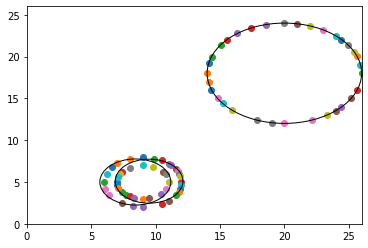

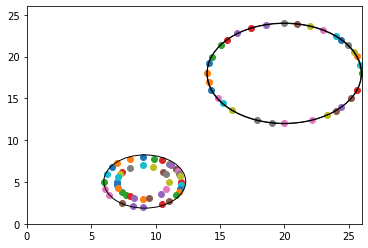

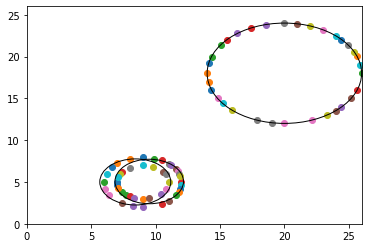

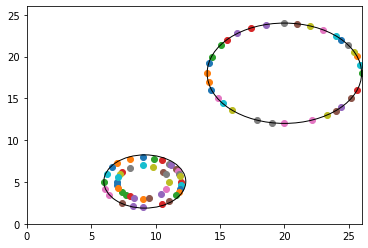

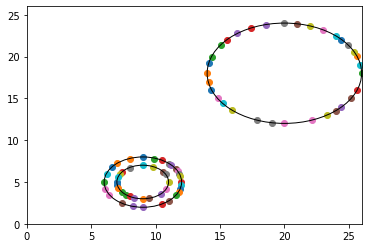

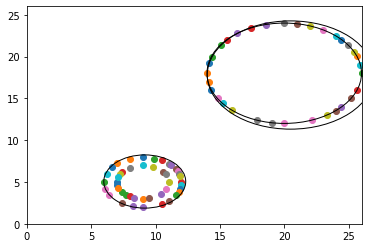

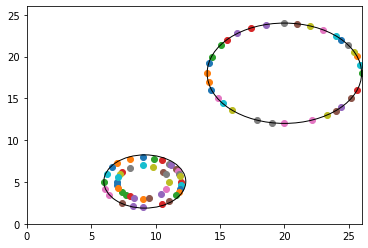

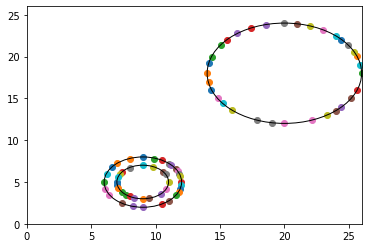

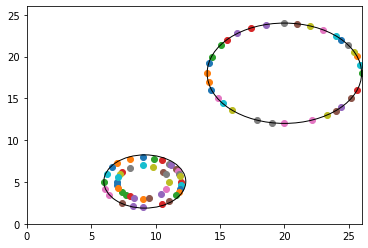

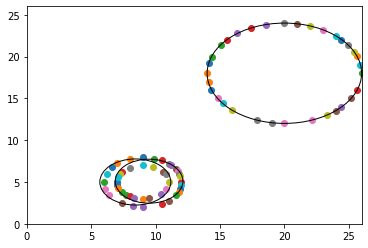

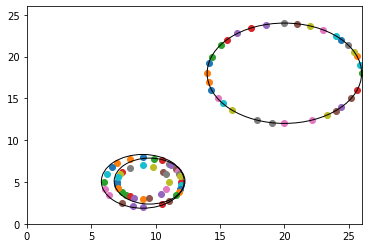

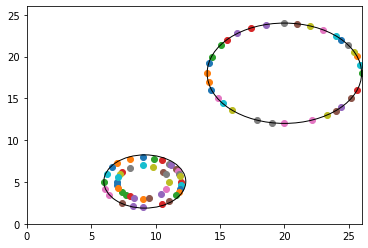

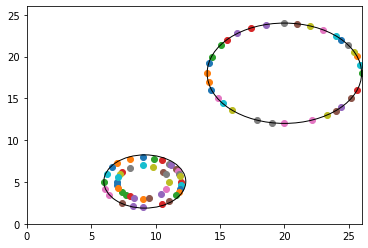

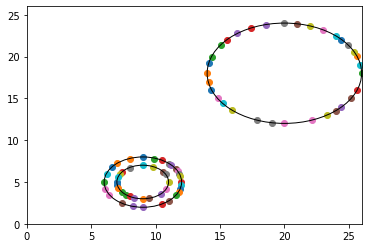

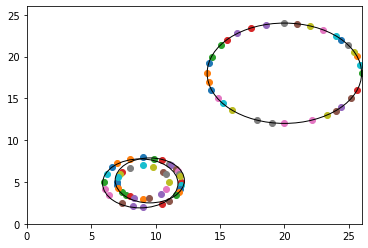

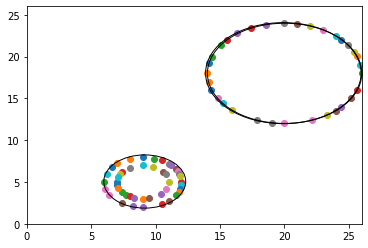

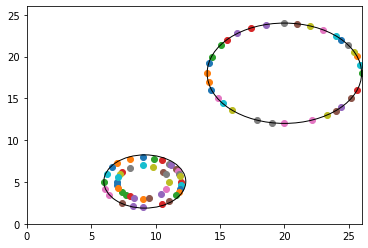

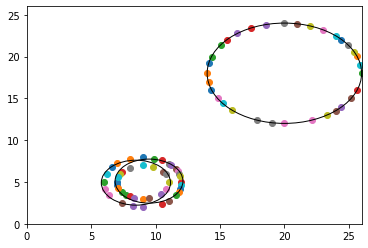

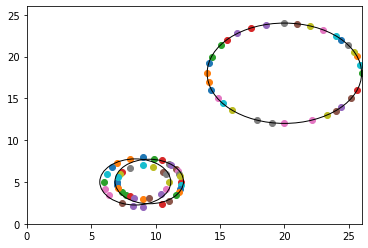

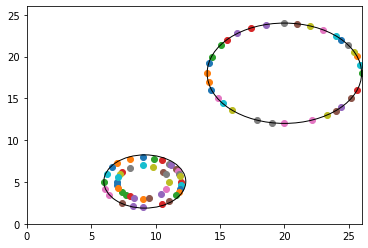

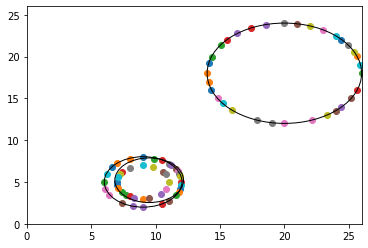

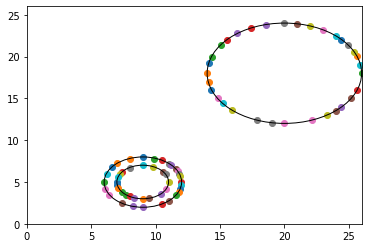

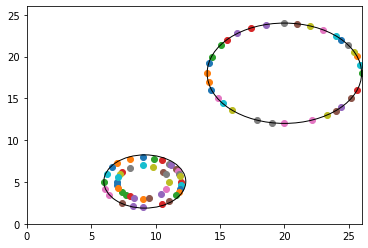

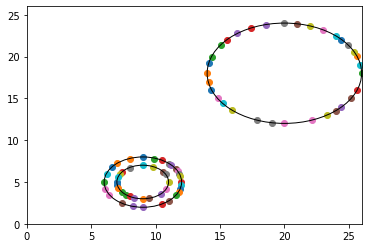

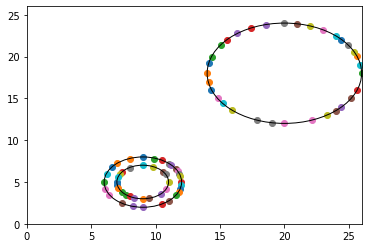

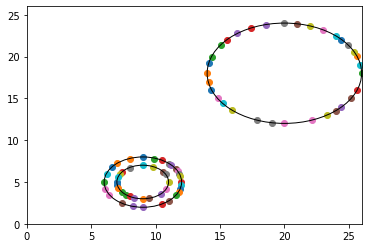

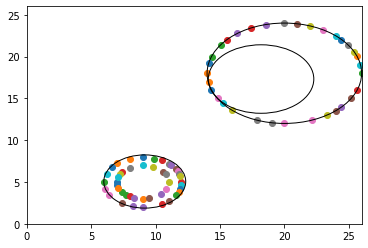

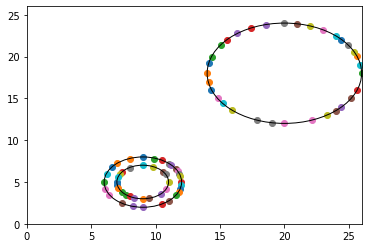

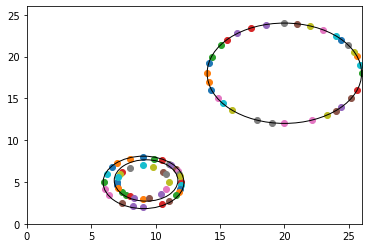

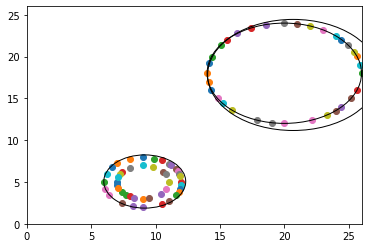

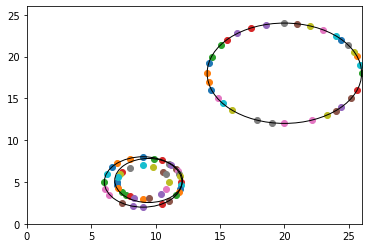

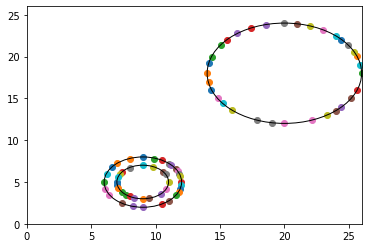

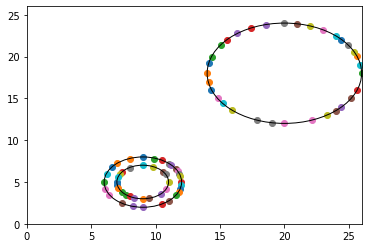

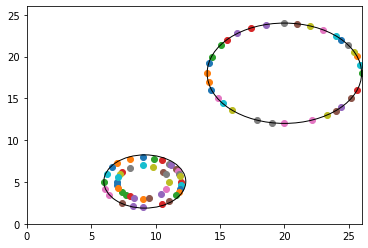

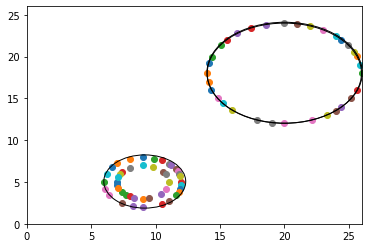

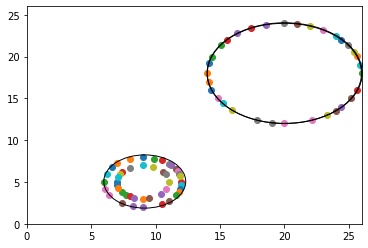

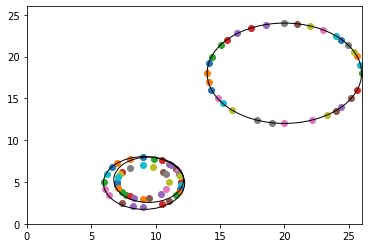

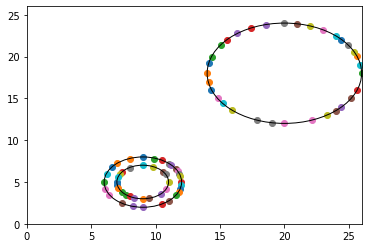

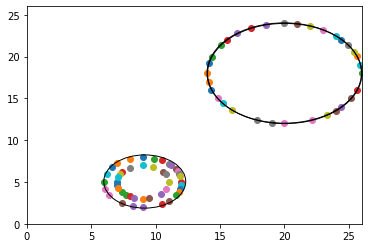

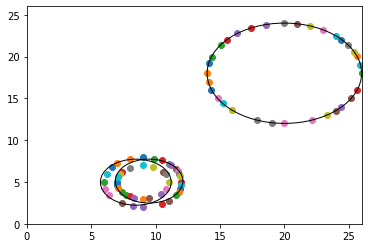

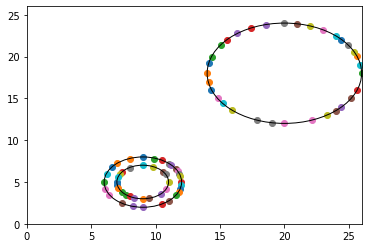

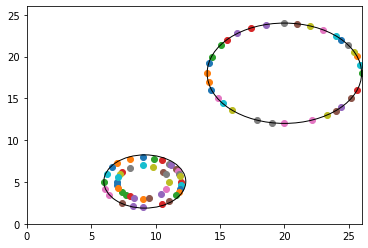

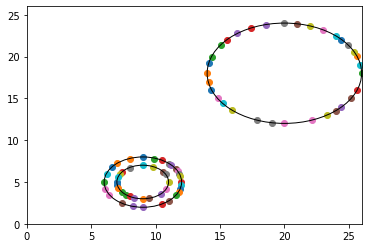

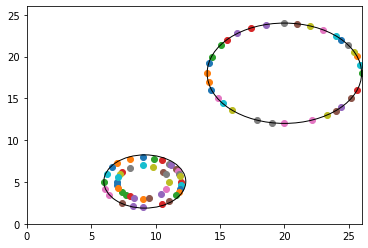

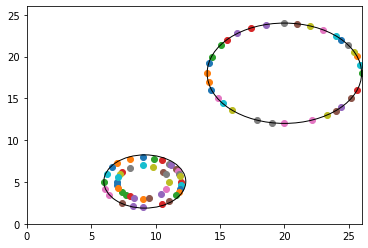

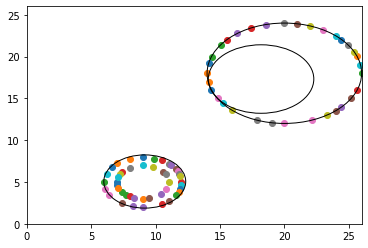

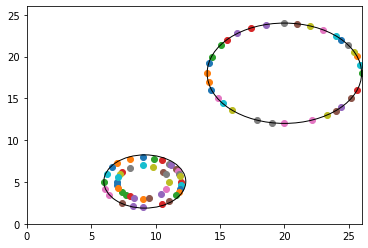

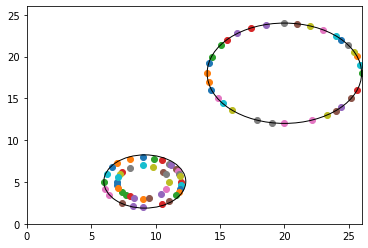

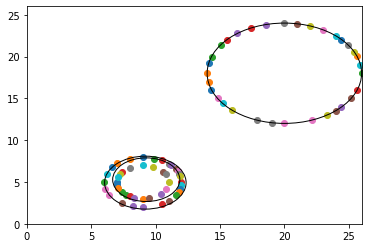

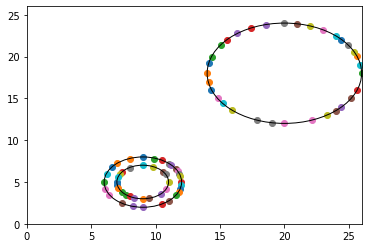

In [120]:
for i in range(0, 50):
    puntos2 = [(9, 8), (7, 7.3), (6, 5), (12, 5), (9, 2), (11, 2.7), (6.4, 3.5), (11, 7.2), (11, 5), (9, 7), (7, 5), (9, 3), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (10.6, 6.2), (20, 12), (20, 24), (22, 23.7), (24, 22.5), (24.4, 22), (25.6, 20.1), (26, 18), (25.6, 16), (24.4, 14), (24, 13.5), (22.1, 12.4), (17.9, 12.4), (15.9, 13.6), (15.2, 14.5), (14.3, 16), (14, 18), (14.4, 20), (15.5, 22), (16.3, 22.8), (25.2, 15), (14.8, 15), (19, 12.1), (23.3, 13), (25.9, 19), (14.1, 19.2), (14.1, 17), (15.1, 21.4), (17.4, 23.4), (18.6, 23.8), (21, 23.9), (23, 23.2), (24.9, 21.4), (25.4, 20.6), (6.2, 6), (6.6, 6.8), (8, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7), (11.6, 6.6), (11.7, 6.3), (11.8, 6), (11.9, 5.7), (12, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8, 6.7), (7.2, 6), (7.1, 5.6), (7, 4.6), (7.1, 4.3), (7.7, 3.5), (8, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2), (10.8, 5.9), (9.8, 6.8)]
    clusters_iniciales = busca_clusters_iniciales(puntos2, 3)
    circulos = busqueda_anillos(puntos2, clusters_iniciales, 20)
    print(circulos)
    import numpy as np
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    for c in circulos:

        ax.set(xlim=(0, 26), ylim = (0, 26))
        a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
        ax.add_artist(a_circle)
    for p in puntos2:
        plt.scatter(p[0], p[1]) 

[((1.9982808758736412, 2.0018808526001277), 0.9987941415912539), ((9.000756676736522, 5.004553463770695), 1.991005681574471)]


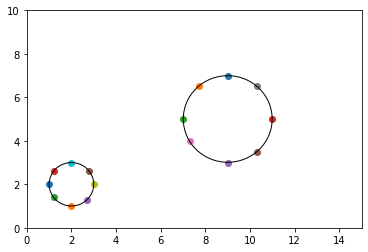

In [121]:
puntos1 = [(9, 7), (7.7, 6.5), (7, 5), (11, 5), (9, 3), (10.3, 3.5), (7.3, 4), (10.3, 6.5), (3, 2), (2, 3), (1, 2), (2, 1), (1.2, 1.4), (1.2, 2.6), (2.7, 1.3), (2.8, 2.6)];
clusters_iniciales = busca_clusters_iniciales(puntos1, 2)
circulos = busqueda_anillos(puntos1, clusters_iniciales, 10)
print(circulos)


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for c in circulos:

    ax.set(xlim=(0, 15), ylim = (0, 10))
    a_circle = plt.Circle((c[0][0], c[0][1]), c[1], fill=False)
    ax.add_artist(a_circle)
for p in puntos1:
    plt.scatter(p[0], p[1]) 